## 30. Аппроксимация данных. Солнечная активность

http://www.sidc.be/silso/datafiles

Ниже представлены данные по солнечной активности (усредненные числа Вольфа) с 1900 по 2015 гг. 
Изобразить данные.
Подобрать модель, аппроксимирующую их. Построить график полученной аппроксимирующей функции.
Можно воспользоваться пребразованием Фурье, чтобы определить частоту колебаний в солнечной активности.
На какой ближайший год придется следующий пик солнечной активности?

```
Читать по строкам (1900...2015):
  15.7 4.6 8.5 40.8 70.1 105.5 90.1 102.8 80.9
  73.2 30.9 9.5 6.0 2.4 16.1 79.0 95.0 173.6 134.6
  105.7 62.7 43.5 23.7 9.7 27.9 74.0 106.5 114.7
  129.7 108.2 59.4 35.1 18.6 9.2 14.6 60.2 132.8
  190.6 182.6 148.0 113.0 79.2 50.8 27.1 16.1 55.3
  154.3 214.7 193.0 190.7 118.9 98.3 45.0 20.1 6.6
  54.2 200.7 269.3 261.7 225.1 159.0 76.4 53.4
  39.9 15.0 22.0 66.8 132.9 150.0 149.4 148.0 94.4
  97.6 54.1 49.2 22.5 18.4 39.3 131.0 220.1 218.9
  198.9 162.4 91.0 60.5 20.6 14.8 33.9 123.0 211.1
  191.8 203.3 133.0 76.1 44.9 25.1 11.6 28.9 88.3
  136.3 173.9 170.4 163.6 99.3 65.3 45.8 24.7 12.6
  4.2 4.8 24.9 80.8 84.5 94.0 113.3 69.8
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import scipy.constants as sc
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline

In [2]:
year  = np.arange(1900, 2016)
temperature = np.array([15.7, 4.6, 8.5, 40.8, 70.1, 105.5, 90.1, 102.8, 80.9, 73.2, 30.9, 9.5, 6.0, 2.4, 16.1, 79.0, 95.0, 173.6, 134.6, 105.7, 62.7, 43.5, 23.7, 9.7, 27.9, 74.0, 106.5, 114.7, 129.7, 108.2, 59.4, 35.1, 18.6, 9.2, 14.6, 60.2, 132.8, 190.6, 182.6, 148.0, 113.0, 79.2, 50.8, 27.1, 16.1, 55.3, 154.3, 214.7, 193.0, 190.7, 118.9, 98.3, 45.0, 20.1, 6.6, 54.2, 200.7, 269.3, 261.7, 225.1, 159.0, 76.4, 53.4, 39.9, 15.0, 22.0, 66.8, 132.9, 150.0, 149.4, 148.0, 94.4, 97.6, 54.1, 49.2, 22.5, 18.4, 39.3, 131.0, 220.1, 218.9, 198.9, 162.4, 91.0, 60.5, 20.6, 14.8, 33.9, 123.0, 211.1, 191.8, 203.3, 133.0, 76.1, 44.9, 25.1, 11.6, 28.9, 88.3, 136.3, 173.9, 170.4, 163.6, 99.3, 65.3, 45.8, 24.7, 12.6, 4.2, 4.8, 24.9, 80.8, 84.5, 94.0, 113.3, 69.8])
print(year)
print(temperature)
pass

[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015]
[ 15.7   4.6   8.5  40.8  70.1 105.5  90.1 102.8  80.9  73.2  30.9   9.5
   6.    2.4  16.1  79.   95.  173.6 134.6 105.7  62.7  43.5  23.7   9.7
  27.9  74.  106.5 114.7 129.7 108.2  59.4  35.1  18.6   9.2  14.6  60.2
 132.8 190.6 182.6 148.  113.   79.2  50.8  27.1  16.1  55.3 154.3 214.7
 193.  190.7 118.9  98.3  45.   20.1   6.6  54.2 200.7 269.3 261.7 225.1
 159.   76.4  53.4  39.9  15.   22.   66.8 13

Изображение точек на графике(точки означают сред.температуру в года от 1900 до 2015)

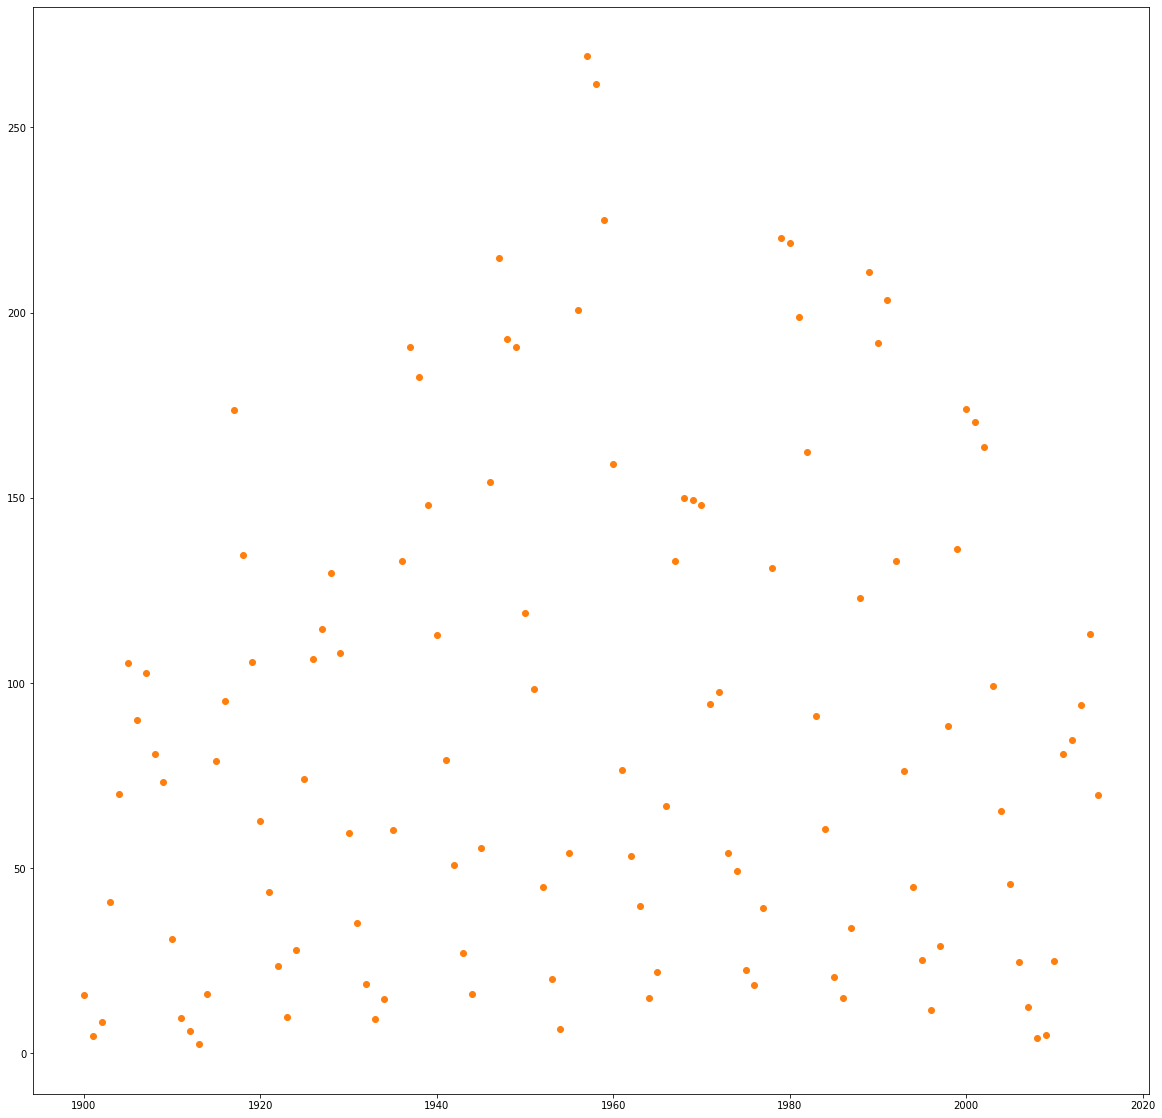

In [3]:
plt.figure(figsize=(20,20))
plt.plot(year, temperature,'o', color='tab:orange')
pass

Построение графика изменения температуры

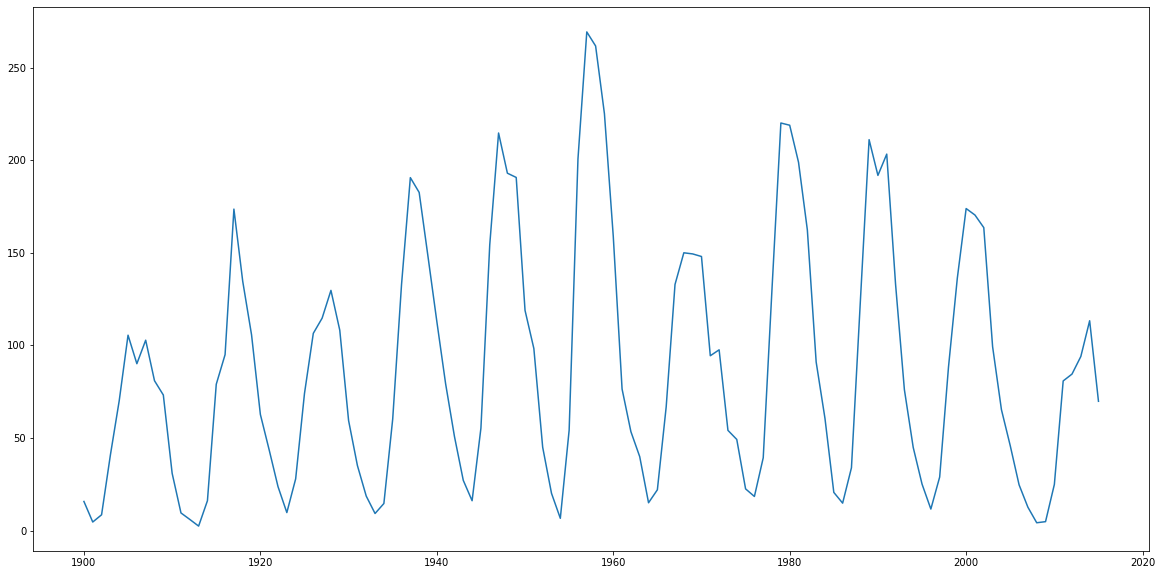

In [4]:
plt.figure(figsize=(20,10))
plt.plot(year, temperature)
pass

In [5]:
min_year = np.array([])
min_temperature = np.array([])
max_year = np.array([])
max_temperature = np.array([])
max = True
for prev, cur, next, y in zip(temperature[:-2], temperature[1:-1], temperature[2:], year[1:-1]):
    if (cur < next and cur < prev and cur < 50 and max):
        min_year = np.append(min_year, y)
        min_temperature = np.append(min_temperature, cur)
        max = False
    if (cur > next and cur > prev and not cur < 50 and not max):
        max_year = np.append(max_year, y)
        max_temperature = np.append(max_temperature, cur)
        max = True
print("Года с минимальной активностью:", min_year.astype(int))
print("Года с максимальной активностью:", max_year.astype(int))

Года с минимальной активностью: [1901 1913 1923 1933 1944 1954 1964 1976 1986 1996 2008]
Года с максимальной активностью: [1905 1917 1928 1937 1947 1957 1968 1979 1989 2000 2014]


Нам нужно вывести на график максимальные и минимальные точки графика, но при это не брать в расчёт точки между наибльшими и наименьшими.

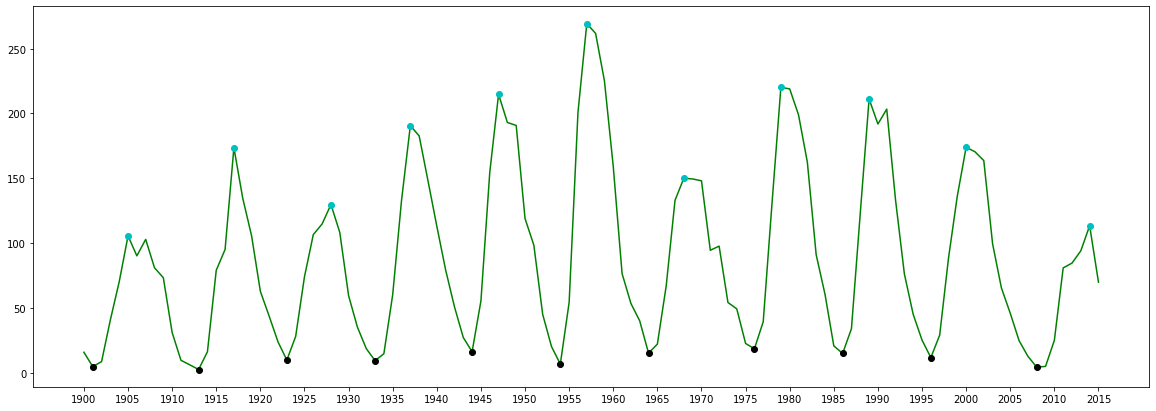

In [6]:
plt.figure(figsize=(20,7))
plt.plot(year, temperature, 'g')
plt.plot(min_year, min_temperature, 'ko')
plt.plot(max_year, max_temperature, 'co')
plt.xticks(year[::5])
pass

Мы нашли минимальные и максимальные показатели и выделили их на графике. Осталось найти закономерность и для этого вычислим числовое изменение показаний максимума и минимума.

Если откинуть все невзятые мною точки, то можно предположить, что данный график похож на синусоиду.(вот где я взял немного информации для данного вывода https://habr.com/ru/post/322954/ и во время изучения Фурье наткнулся на это https://www.cyberforum.ru/python/thread1580915.html)

In [7]:
min_temperature_sub = min_year[1:] - min_year[:-1]
min_year_sub_lable = [str(f) + " - " + str(s) for f, s in zip(min_year[:-1].astype(int), min_year[1:].astype(int))]
min_mean = gmean(min_temperature_sub)
print("Средняя разница в годах между минимуми солнечной активности:", min_mean)

Средняя разница в годах между минимуми солнечной активности: 10.663349463976184


In [8]:
T = 2 * np.pi / min_mean
M = 1.5 * np.pi + T
step = 4
year = np.arange(1900, 2016, 1 / step)
sin_max_temperature = np.sin((year - 1902) * np.pi * 0.01 + np.pi * 1.92) * 135 + 135
sin_temperature = np.sin(T * (year - 1902) + M) * sin_max_temperature / 2 + sin_max_temperature / 2

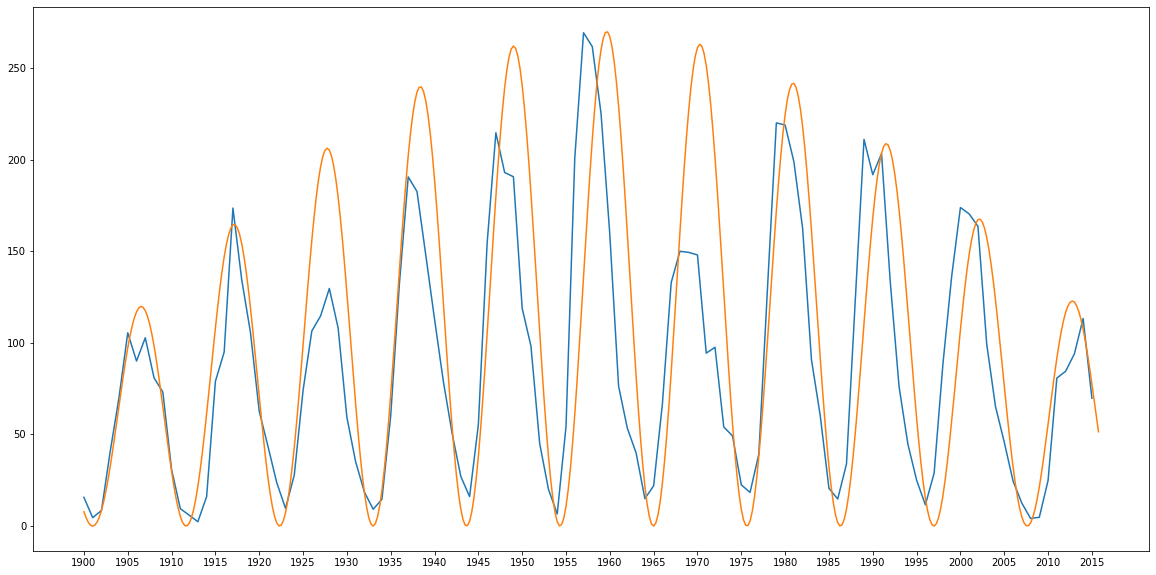

In [9]:
plt.figure(figsize=(20,10))
plt.plot(year[0:step * (2015 - 1900) + 1:step],temperature)
plt.plot(year, sin_temperature)
plt.xticks(year[::20])
pass

т.к. нам нужна ближайшая пиковая точка после 2015, то построим график на основе точек максимума

Многие точки максимума очень хорошо подходят к построенной синусоиде(конечно есть погрешности).
Предположение оказалось верным график крайне сильно схож с синусоидой. Осталось только, используя уже найденную частоту построить апроксимацию и вычислить след. макс.показатель.

In [10]:
step = 5
year = np.arange(1900, 2100, 1 / step)
sin_max_temperature = np.sin((year - 1902) * np.pi * 0.01 + np.pi * 1.92) * 135 + 135
sin_temperature =np.sin(T * (year - 1902) + M) * sin_max_temperature / 2 + sin_max_temperature / 2

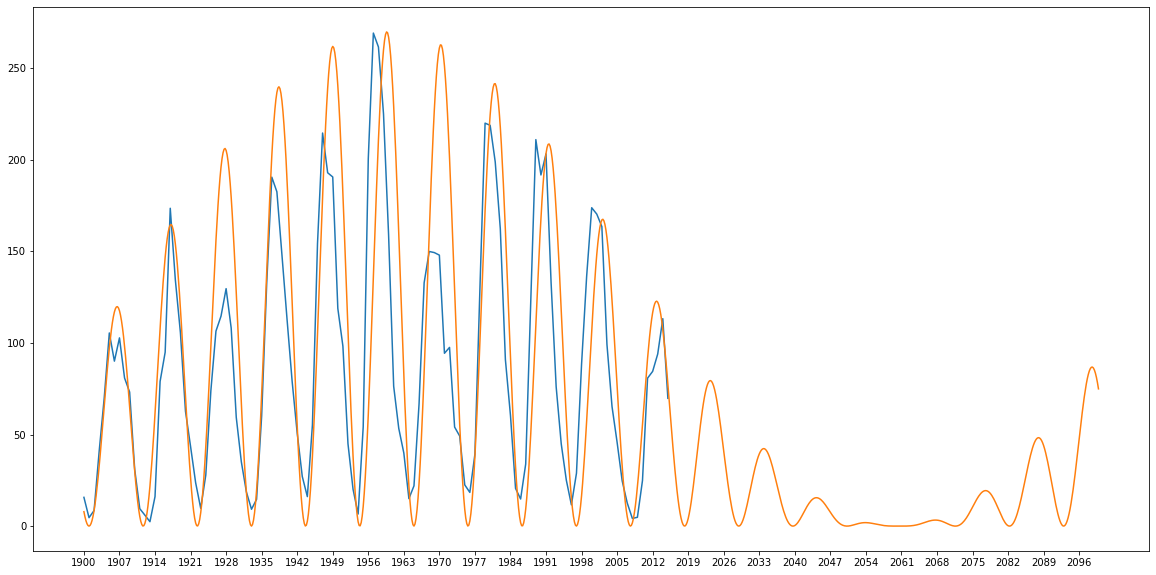

In [11]:
plt.figure(figsize=(20,10))
plt.plot(year[0:step * (2015 - 1900) + 1:step], temperature)
plt.plot(year, sin_temperature)
plt.xticks(year[::5 * (step + 2)].astype(int))
pass

Апроксимация прошла успешно и след. max показатель будет в диапазоне 2020-2027.Осталось только вычислить точный год

In [12]:
max_temperature_sub = max_year[1:] - max_year[:-1]
max_mean = gmean(max_temperature_sub)
print("Следующий пик:", np.arange(max_year[len(max_year) - 1], 2027, max_mean)[1:].astype(int))

Следующий пик: [2024]


Первый следующий пик будет в 2024 году. Надеюсь, я понятно истолковал своё решение данной задачи и прикладываю ещё материал, с помощью которого я смог выполнить поставленную задачу. https://habr.com/ru/post/439288/ , https://stackoverflow.com/questions/24842360/scipy-optimization-linear-function-approximation, https://www.youtube.com/watch?v=j7IWZU05fKM